In [7]:
import json
import numpy as np
import matplotlib.pyplot as plt

def convert_numpy_arrays_to_lists(dictionary):
    """Convert NumPy arrays to Python lists recursively in a dictionary."""
    for key, value in dictionary.items():
        if isinstance(value, np.ndarray):
            dictionary[key] = value.tolist()
        elif isinstance(value, dict):
            dictionary[key] = convert_numpy_arrays_to_lists(value)
    return dictionary

def write_dict_to_file(data_dict, file_path):
    try:
        # Convert NumPy arrays to lists in the dictionary
        data_dict = convert_numpy_arrays_to_lists(data_dict)
        
        # Write the modified dictionary to the file with indentation
        with open(file_path, 'w') as file:
            json.dump(data_dict, file)
        print(f"Dictionary written to {file_path} successfully.")
    except Exception as e:
        print(f"Error writing dictionary to {file_path}: {str(e)}")

def read_dict_from_file(file_path):
    try:
        # Read the dictionary from the JSON file
        with open(file_path, 'r') as file:
            data_dict = json.load(file)

        # Convert lists back to NumPy arrays in the dictionary
        data_dict = convert_lists_to_numpy_arrays(data_dict)

        print(f"Dictionary read from {file_path} successfully.")
        return data_dict
    except Exception as e:
        print(f"Error reading dictionary from {file_path}: {str(e)}")
        return None

def convert_lists_to_numpy_arrays(dictionary):
    """Convert Python lists to NumPy arrays recursively in a dictionary."""
    for key, value in dictionary.items():
        if isinstance(value, list):
            dictionary[key] = np.array(value)
        elif isinstance(value, dict):
            dictionary[key] = convert_lists_to_numpy_arrays(value)
    return dictionary

In [14]:
tpe_adaptec = read_dict_from_file("tpe-adaptec.json")
metalearn_adaptec = read_dict_from_file("meta-learn-adaptec.json")

Dictionary read from tpe-adaptec.json successfully.
Dictionary read from meta-learn-adaptec.json successfully.


In [31]:
loss_tpe_adaptec = tpe_adaptec["adaptec4"]["loss"]
loss_metalearn_adaptec = metalearn_adaptec["adaptec4"]["loss"]

In [32]:
loss_tpe_adaptec_filtered = [l for l in loss_tpe_adaptec if l < 20.0e+07]
loss_metalearn_adaptec_filtered = [l for l in loss_metalearn_adaptec if l < 20.0e+07]

In [50]:
len(loss_tpe_adaptec) - len(loss_tpe_adaptec_filtered)

7

In [51]:
len(loss_metalearn_adaptec) - len(loss_metalearn_adaptec_filtered)

10

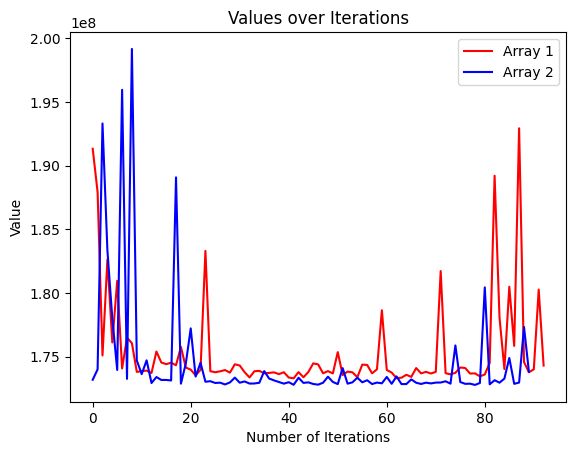

In [33]:
# Plotting the data
plt.plot(np.arange(len(loss_tpe_adaptec_filtered)), loss_tpe_adaptec_filtered, color='red', label='Array 1')
plt.plot(np.arange(len(loss_metalearn_adaptec_filtered)), loss_metalearn_adaptec_filtered, color='blue', label='Array 2')

# Adding labels and title
plt.xlabel('Number of Iterations')
plt.ylabel('Value')
plt.title('Values over Iterations')

# Adding legend
plt.legend()

# Show the plot
plt.show()

In [44]:
tpe_bigblue = read_dict_from_file("tpe-bigblue.json")
metalearn_bigblue = read_dict_from_file("meta-learn-bigblue.json")

loss_tpe_bigblue = tpe_bigblue["bigblue4"]["loss"]
loss_metalearn_bigblue = metalearn_bigblue["bigblue4"]["loss"]

Dictionary read from tpe-bigblue.json successfully.
Dictionary read from meta-learn-bigblue.json successfully.


In [45]:
loss_tpe_bigblue[-1], loss_tpe_bigblue[-2], loss_tpe_bigblue[-3]

(743154000.0, 743437300.0, 743178800.0)

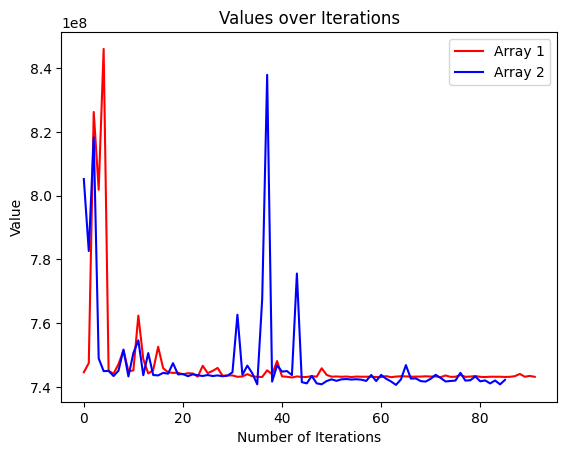

In [48]:
loss_tpe_bigblue_filtered = [l for l in loss_tpe_bigblue if l < 8.5e+08]
loss_metalearn_bigblue_filtered = [l for l in loss_metalearn_bigblue if l < 8.5e+08]

# Plotting the data
plt.plot(np.arange(len(loss_tpe_bigblue_filtered)), loss_tpe_bigblue_filtered, color='red', label='Array 1')
plt.plot(np.arange(len(loss_metalearn_bigblue_filtered)), loss_metalearn_bigblue_filtered, color='blue', label='Array 2')

# Adding labels and title
plt.xlabel('Number of Iterations')
plt.ylabel('Value')
plt.title('Values over Iterations')

# Adding legend
plt.legend()

# Show the plot
plt.show()